In [87]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import os
while 'notebooks' in os.getcwd():
    os.chdir("..")

import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from statistics import mean
from tqdm import tqdm
from sklearn.metrics import mean_squared_error

from src.mapping import get_movies_id_map
from src.collaborative_filtering.preprocessing.make_dataset \
    import read_train_test_matrix, read_ratings_df

from src.collaborative_filtering.models.train_model import \
    SGDOptimizer

## Model training

We will train two matrices $ X $ and $ X $ as

$$ X = (x_{ij})_{n_{features} \times n_{movies}} $$ 
$$ \Theta = (\theta _{ij})_{n_{features} \times n_{users}} $$

<!-- $$ X= 
\begin{pmatrix} 

    X _{1,1} & X _{1,2} & \dots & X _{1, n_{features}} \\ 
    X _{2,1} & X _{2,2} & \dots & X _{2, n_{features}} \\ 
    \vdots & \vdots & \vdots & \vdots \\ 
    X _{n_{movies}, 1} & X _{n_{movies}, 2} & \dots & X _{n_{movies}, n_{features}}
    
\end{pmatrix}
$$

$$ \Theta = 
\begin{pmatrix} 

    \theta _{1,1} & \theta _{1,2} & \dots & \theta _{1, n_{features}} \\ 
    \theta _{2,1} & \theta _{2,2} & \dots & \theta _{2, n_{features}} \\ 
    \vdots & \vdots & \vdots & \vdots \\ 
    \theta _{n_{users}, 1} & \theta _{n_{users}, 2} & \dots & \theta _{n_{users}, n_{features}}
    
\end{pmatrix}
$$ -->

and 

$$ \hat{Y} = \Theta ^T X $$

Minimizing the cost function 

$$
    J(\Theta, X) = \sum (y - \theta ^{(i)T}  x^{(j)}) ^2 + \lambda (|| \theta^{(i)} ||^2 + || x^{(j)} || ^2 )
$$

Here we are using $l_2$ regularization

In [10]:
ratings_df = read_ratings_df()

ratings_matrix = ratings_df.pivot(
    index = 'userID',
    columns= 'movieID',
    values= 'rating',
).replace(np.nan, 0)

In [11]:
Y_train, Y_test = read_train_test_matrix()

In [12]:
n_users, n_movies = Y_train.shape

In [13]:
users, movies = np.nonzero(np.array(Y_train))

In [20]:
y_train = np.array(Y_train)

In [21]:
model = SGDOptimizer()

In [22]:
model.get_params()

{'learning_rate': 0.001,
 'num_features': 5,
 'regularization_factor': 0.1,
 'train_epochs': 100}

In [23]:
model.fit(y_train)

599854it [00:13, 43957.10it/s]


train epoch 0;  9.491049160192686


599854it [00:13, 44396.94it/s]


train epoch 1;  5.789267021088728


599854it [00:13, 43685.19it/s]


train epoch 2;  4.382339744598239


599854it [00:13, 43660.65it/s]


train epoch 3;  3.5860425550873205


599854it [00:12, 46749.51it/s]


train epoch 4;  3.061264326249666


599854it [00:11, 50785.09it/s]


train epoch 5;  2.6887460652961988


599854it [00:14, 41327.40it/s]


train epoch 6;  2.41220943169464


599854it [00:13, 43936.87it/s]


train epoch 7;  2.2002722367764163


599854it [00:15, 39055.50it/s]


train epoch 8;  2.0337471633552555


599854it [00:13, 45019.64it/s]


train epoch 9;  1.9002350331172515


599854it [00:14, 41916.66it/s]


train epoch 10;  1.7913899102829494


599854it [00:15, 38249.57it/s]


train epoch 11;  1.7013947368730447


599854it [00:13, 42888.81it/s]


train epoch 12;  1.6260690849845274


599854it [00:14, 41840.40it/s]


train epoch 13;  1.5623296046214596


599854it [00:15, 39648.51it/s]


train epoch 14;  1.507853263611148


599854it [00:13, 43382.41it/s]


train epoch 15;  1.4608598609862025


599854it [00:13, 44780.82it/s]


train epoch 16;  1.4199665540624482


599854it [00:13, 44455.93it/s]


train epoch 17;  1.384087267436385


599854it [00:12, 48047.55it/s]


train epoch 18;  1.3523610836162245


599854it [00:12, 48840.78it/s]


train epoch 19;  1.3241000306466908


599854it [00:12, 48086.01it/s]


train epoch 20;  1.2987502877952009


599854it [00:13, 46005.08it/s]


train epoch 21;  1.2758629390313085


599854it [00:12, 46457.95it/s]


train epoch 22;  1.255071676997267


599854it [00:11, 50890.07it/s]


train epoch 23;  1.236075657190445


599854it [00:12, 49416.60it/s]


train epoch 24;  1.2186262201885831


599854it [00:12, 49973.00it/s]


train epoch 25;  1.2025165486969847


599854it [00:12, 47487.46it/s]


train epoch 26;  1.1875735686800462


599854it [00:13, 44789.43it/s]


train epoch 27;  1.1736515768007105


599854it [00:13, 45190.08it/s]


train epoch 28;  1.1606272023909148


599854it [00:13, 44402.15it/s]


train epoch 29;  1.1483954054470689


599854it [00:13, 45674.32it/s]


train epoch 30;  1.136866282033967


599854it [00:12, 48803.78it/s]


train epoch 31;  1.1259625012991505


599854it [00:12, 46534.86it/s]


train epoch 32;  1.1156172384619911


599854it [00:13, 45025.12it/s]


train epoch 33;  1.1057724988191404


599854it [00:12, 49107.46it/s]


train epoch 34;  1.0963777513005677


599854it [00:12, 47305.11it/s]


train epoch 35;  1.0873888081609269


599854it [00:14, 41452.68it/s]


train epoch 36;  1.0787669012764505


599854it [00:14, 40298.32it/s]


train epoch 37;  1.0704779162312346


599854it [00:15, 38551.22it/s]


train epoch 38;  1.062491753657373


599854it [00:12, 49000.09it/s]


train epoch 39;  1.0547817937138773


599854it [00:14, 41527.76it/s]


train epoch 40;  1.0473244445783454


599854it [00:12, 47550.72it/s]


train epoch 41;  1.0400987597187379


599854it [00:14, 42406.57it/s]


train epoch 42;  1.033086111758889


599854it [00:13, 44631.52it/s]


train epoch 43;  1.0262699131460011


599854it [00:12, 46421.59it/s]


train epoch 44;  1.0196353757179326


599854it [00:16, 37432.58it/s]


train epoch 45;  1.0131693027644761


599854it [00:13, 43527.56it/s]


train epoch 46;  1.0068599083679175


599854it [00:13, 45745.23it/s]


train epoch 47;  1.0006966597605578


599854it [00:12, 48936.29it/s]


train epoch 48;  0.994670139201291


599854it [00:13, 45870.71it/s]


train epoch 49;  0.988771922485948


599854it [00:16, 37002.83it/s]


train epoch 50;  0.9829944717072286


599854it [00:15, 39684.60it/s]


train epoch 51;  0.9773310402808819


599854it [00:14, 40120.16it/s]


train epoch 52;  0.971775588584384


599854it [00:15, 39405.07it/s]


train epoch 53;  0.9663227088224937


599854it [00:14, 41545.43it/s]


train epoch 54;  0.9609675579539544


599854it [00:13, 45264.11it/s]


train epoch 55;  0.9557057976925103


599854it [00:14, 41314.71it/s]


train epoch 56;  0.9505335407447475


599854it [00:14, 41296.55it/s]


train epoch 57;  0.9454473025698412


599854it [00:15, 39624.94it/s]


train epoch 58;  0.9404439580452961


599854it [00:12, 48723.62it/s]


train epoch 59;  0.9355207025085566


599854it [00:12, 47384.02it/s]


train epoch 60;  0.9306750167138299


599854it [00:13, 44132.67it/s]


train epoch 61;  0.925904635300476


599854it [00:15, 39186.66it/s]


train epoch 62;  0.9212075184198135


599854it [00:13, 45361.55it/s]


train epoch 63;  0.9165818262071533


599854it [00:14, 42275.45it/s]


train epoch 64;  0.91202589582191


599854it [00:14, 40294.15it/s]


train epoch 65;  0.9075382208077399


599854it [00:14, 40397.08it/s]


train epoch 66;  0.9031174325511495


599854it [00:13, 44616.25it/s]


train epoch 67;  0.898762283639106


599854it [00:14, 41939.51it/s]


train epoch 68;  0.8944716329350286


599854it [00:14, 41144.32it/s]


train epoch 69;  0.8902444322116996


599854it [00:12, 48819.22it/s]


train epoch 70;  0.8860797141922134


599854it [00:12, 47781.89it/s]


train epoch 71;  0.8819765818663493


599854it [00:14, 41957.76it/s]


train epoch 72;  0.8779341989604005


599854it [00:12, 46540.05it/s]


train epoch 73;  0.8739517814495675


599854it [00:12, 47298.19it/s]


train epoch 74;  0.8700285900139465


599854it [00:15, 39766.46it/s]


train epoch 75;  0.8661639233447067


599854it [00:14, 41215.63it/s]


train epoch 76;  0.8623571122199603


599854it [00:13, 44762.70it/s]


train epoch 77;  0.8586075142726446


599854it [00:13, 44138.96it/s]


train epoch 78;  0.8549145093836102


599854it [00:13, 45489.18it/s]


train epoch 79;  0.8512774956370757


599854it [00:12, 47462.68it/s]


train epoch 80;  0.847695885782095


599854it [00:12, 48509.14it/s]


train epoch 81;  0.8441691041488636


599854it [00:12, 47225.45it/s]


train epoch 82;  0.840696583974325


599854it [00:12, 47257.24it/s]


train epoch 83;  0.8372777650932877


599854it [00:12, 47185.83it/s]


train epoch 84;  0.8339120919596524


599854it [00:13, 44854.99it/s]


train epoch 85;  0.8305990119606751


599854it [00:13, 44484.82it/s]


train epoch 86;  0.8273379739952902


599854it [00:12, 48380.14it/s]


train epoch 87;  0.8241284272866501


599854it [00:15, 37578.52it/s]


train epoch 88;  0.8209698204050276


599854it [00:17, 34721.73it/s]


train epoch 89;  0.817861600476615


599854it [00:16, 36141.19it/s]


train epoch 90;  0.8148032125581178


599854it [00:17, 35203.22it/s]


train epoch 91;  0.8117940991583158


599854it [00:14, 42115.87it/s]


train epoch 92;  0.8088336998891262


599854it [00:12, 46976.48it/s]


train epoch 93;  0.8059214512313001


599854it [00:14, 40785.80it/s]


train epoch 94;  0.803056786400278


599854it [00:14, 41901.36it/s]


train epoch 95;  0.8002391352999846


599854it [00:14, 41258.42it/s]


train epoch 96;  0.7974679245533745


599854it [00:19, 31335.35it/s]


train epoch 97;  0.7947425775982686


599854it [00:18, 32172.93it/s]


train epoch 98;  0.7920625148409832


599854it [00:13, 46051.61it/s]


train epoch 99;  0.7894271538577252


In [24]:
history = model.get_evaluation_errors()

Text(0.5, 1.0, 'Training errors')

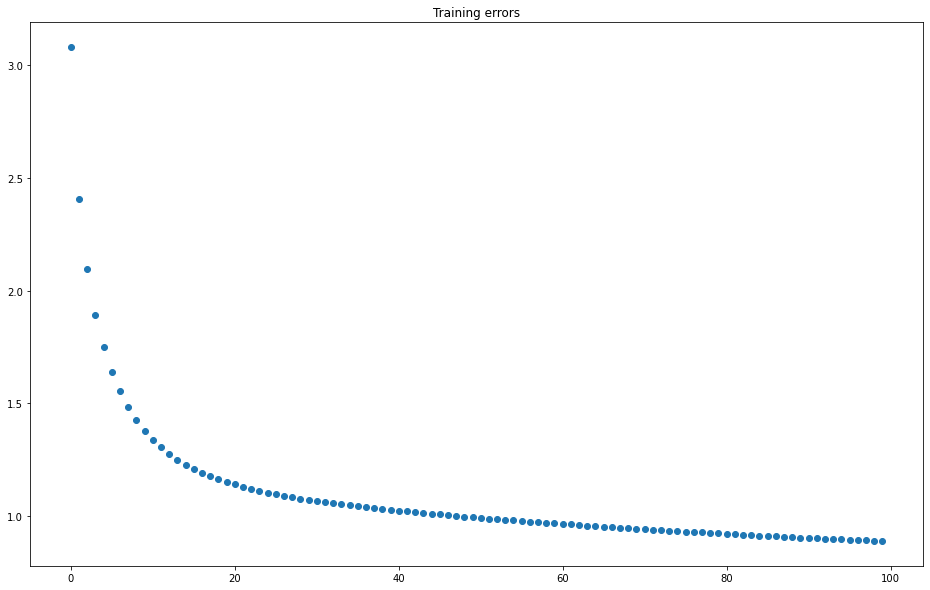

In [29]:
plt.figure(figsize = [16,10])
plt.plot(
    history,
    'o'
)
plt.title("Training errors")

In [33]:
X, Theta = model.X, model.Theta

In [37]:
X.shape

(5, 10109)

In [36]:
ratings_df

,userID,movieID,rating,date_day,date_month,date_year,date_hour,date_minute,date_second
0,75,3,1.0,29,10,2006,23,17,16
1,75,32,4.5,29,10,2006,23,23,44
2,75,110,4.0,29,10,2006,23,30,8
3,75,160,2.0,29,10,2006,23,16,52
4,75,163,4.0,29,10,2006,23,29,30
...,...,...,...,...,...,...,...,...,...
855593,71534,44555,4.0,3,12,2007,3,5,38
855594,71534,46578,4.0,3,12,2007,2,56,44
855595,71534,48516,4.5,3,12,2007,2,53,46
855596,71534,61075,5.0,10,10,2008,9,56,5


In [53]:
model.rms(
    y_train,
    (Theta.T @ X)
)

0.8884971321606719

In [54]:
Theta.tofile(
    "data/collaborative-filtering/model/Theta.csv",
    sep= ','    
)

In [55]:
X.tofile(
    "data/collaborative-filtering/model/X.csv",
    sep= ','    
)

In [71]:
y_pred = Theta.T @ X

Text(0.5, 6.79999999999999, 'prediction')

<Figure size 1152x720 with 0 Axes>

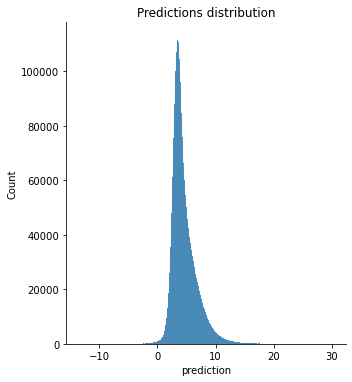

In [84]:
plt.figure(figsize = [16, 10])
sns.displot(y_pred.flatten())
plt.title("Predictions distribution")
plt.xlabel("prediction")

In [83]:
{
    'max value': y_pred.max(),
    'min value': y_pred.min(),
    'average value': y_pred.mean(),
    'median value': np.median(y_pred), 
    'quantile 0.05' : np.quantile(y_pred, 0.05),
    'quantile 0.9': np.quantile(y_pred, 0.9),
}

{'max value': 30.20197635552509,
 'min value': -13.463585835260478,
 'average value': 4.566684395355384,
 'median value': 4.028098641057578,
 'quantile 0.05': 2.1960996106478317,
 'quantile 0.9': 7.331709226871486}

### Train model with constraints 
As we can see, some predictions are out of the domain of ratings ${0, \ \dots, 5}$
We will them add a constraint to ```y_pred``` and re-train the model 

In [70]:
y_pred[y_pred > 5] = 5
y_pred[y_pred < 0] = 0

In [88]:
model = SGDOptimizer(
    predict_constraints = True
)

In [91]:
model.fit(y_train)

599854it [00:12, 49504.97it/s]


train epoch 0;  109.30358781854937


599854it [00:13, 44828.57it/s]


train epoch 1;  46.53531686384837


599854it [00:14, 42285.56it/s]


train epoch 2;  27.960891876567818


599854it [00:14, 42018.35it/s]


train epoch 3;  19.564998283229507


599854it [00:14, 41377.10it/s]


train epoch 4;  14.898133629510083


599854it [00:15, 37713.72it/s]


train epoch 5;  11.954226900730369


599854it [00:13, 44724.91it/s]


train epoch 6;  9.9430734190366


599854it [00:13, 44302.47it/s]


train epoch 7;  8.485866937059429


599854it [00:13, 45517.78it/s]


train epoch 8;  7.381415982000338


599854it [00:11, 50162.33it/s]


train epoch 9;  6.516169063703796


599854it [00:12, 48847.45it/s]


train epoch 10;  5.818244876779674


599854it [00:13, 44832.26it/s]


train epoch 11;  5.241361204964667


599854it [00:15, 39691.65it/s]


train epoch 12;  4.756843343595526


599854it [00:13, 43127.63it/s]


train epoch 13;  4.344705709292721


599854it [00:18, 32765.54it/s]


train epoch 14;  3.9901991033597137


599854it [00:18, 32594.32it/s]


train epoch 15;  3.6837644750677816


599854it [00:14, 40164.96it/s]


train epoch 16;  3.417347449596112


599854it [00:15, 39516.25it/s]


train epoch 17;  3.1839661584351275


599854it [00:14, 40142.23it/s]


train epoch 18;  2.9781814608193633


599854it [00:14, 41637.20it/s]


train epoch 19;  2.7953422122360747


599854it [00:12, 47618.29it/s]


train epoch 20;  2.6321225695618895


599854it [00:12, 49694.24it/s]


train epoch 21;  2.486007995840781


599854it [00:11, 53667.90it/s]


train epoch 22;  2.355029237082946


599854it [00:10, 59846.93it/s]


train epoch 23;  2.2374731224763234


599854it [00:10, 59284.39it/s]


train epoch 24;  2.1315036684215403


599854it [00:09, 61412.66it/s]


train epoch 25;  2.035595154778955


599854it [00:10, 59561.76it/s]


train epoch 26;  1.9485498994337709


599854it [00:09, 60228.09it/s]


train epoch 27;  1.8693043485465055


599854it [00:09, 63125.52it/s]


train epoch 28;  1.7969713766296944


599854it [00:09, 62814.80it/s]


train epoch 29;  1.7307719864759303


599854it [00:09, 62064.93it/s]


train epoch 30;  1.670028818004042


599854it [00:09, 63559.92it/s]


train epoch 31;  1.614206507947521


599854it [00:09, 62163.39it/s]


train epoch 32;  1.5628423921990917


599854it [00:09, 61896.16it/s]


train epoch 33;  1.5155595359862641


599854it [00:09, 62062.67it/s]


train epoch 34;  1.472026979499851


599854it [00:09, 62187.82it/s]


train epoch 35;  1.4319336955008146


599854it [00:09, 63299.47it/s]


train epoch 36;  1.3949861260645067


599854it [00:09, 61265.93it/s]


train epoch 37;  1.3609114912652558


599854it [00:09, 61895.37it/s]


train epoch 38;  1.3294463401633678


599854it [00:09, 63474.67it/s]


train epoch 39;  1.3003405438088642


599854it [00:09, 62573.72it/s]


train epoch 40;  1.2733771632167559


599854it [00:09, 63052.15it/s]


train epoch 41;  1.2483474903921747


599854it [00:09, 62838.86it/s]


train epoch 42;  1.2250654132462546


599854it [00:09, 62277.31it/s]


train epoch 43;  1.2033686566023047


599854it [00:18, 31957.47it/s]


train epoch 44;  1.1831054880434333


599854it [00:15, 38140.22it/s]


train epoch 45;  1.1641429094950797


599854it [00:17, 35257.87it/s]


train epoch 46;  1.1463675682463277


599854it [00:11, 52956.23it/s]


train epoch 47;  1.129679826443018


599854it [00:12, 49375.15it/s]


train epoch 48;  1.1139882969859138


599854it [00:11, 50803.73it/s]


train epoch 49;  1.099206560261458


599854it [00:12, 46504.22it/s]


train epoch 50;  1.0852573559538008


599854it [00:12, 49293.34it/s]


train epoch 51;  1.0720784370253342


599854it [00:14, 42783.39it/s]


train epoch 52;  1.0596115597798303


599854it [00:13, 46106.26it/s]


train epoch 53;  1.0478039024842445


599854it [00:12, 48747.38it/s]


train epoch 54;  1.0366064008298428


599854it [00:12, 49202.76it/s]


train epoch 55;  1.0259725051256021


599854it [00:11, 50642.50it/s]


train epoch 56;  1.0158603141226572


599854it [00:11, 54186.63it/s]


train epoch 57;  1.0062367767665905


599854it [00:11, 53661.53it/s]


train epoch 58;  0.9970664581849809


599854it [00:11, 54014.43it/s]


train epoch 59;  0.9883152004754718


599854it [00:12, 48451.25it/s]


train epoch 60;  0.9799518096620078


599854it [00:11, 54452.60it/s]


train epoch 61;  0.9719479090857892


599854it [00:12, 47869.56it/s]


train epoch 62;  0.96427712646795


599854it [00:12, 47773.16it/s]


train epoch 63;  0.9569149589852902


599854it [00:12, 49744.25it/s]


train epoch 64;  0.9498388558882703


599854it [00:12, 47410.84it/s]


train epoch 65;  0.9430279751919372


599854it [00:12, 48816.50it/s]


train epoch 66;  0.936463721974929


599854it [00:11, 53945.06it/s]


train epoch 67;  0.9301316516103483


599854it [00:11, 50956.40it/s]


train epoch 68;  0.9240182846428526


599854it [00:11, 51158.00it/s]


train epoch 69;  0.918110808708033


599854it [00:12, 48487.38it/s]


train epoch 70;  0.9123969365773852


599854it [00:11, 50848.23it/s]


train epoch 71;  0.9068654670420478


599854it [00:12, 48176.42it/s]


train epoch 72;  0.9015071637120008


599854it [00:11, 50753.05it/s]


train epoch 73;  0.8963140870675114


599854it [00:14, 40112.92it/s]


train epoch 74;  0.8912789010630877


599854it [00:11, 53192.85it/s]


train epoch 75;  0.8863934656864159


599854it [00:10, 55160.14it/s]


train epoch 76;  0.8816510141351486


599854it [00:11, 53956.41it/s]


train epoch 77;  0.8770450599676738


599854it [00:10, 55792.76it/s]


train epoch 78;  0.8725690228201287


599854it [00:11, 53336.90it/s]


train epoch 79;  0.8682178936589889


599854it [00:11, 51071.26it/s]


train epoch 80;  0.86398645268534


599854it [00:11, 51618.51it/s]


train epoch 81;  0.8598693649116917


599854it [00:11, 50869.40it/s]


train epoch 82;  0.855861373495763


599854it [00:11, 54012.00it/s]


train epoch 83;  0.851958370929343


599854it [00:11, 53548.21it/s]


train epoch 84;  0.8481566995534799


599854it [00:12, 49734.30it/s]


train epoch 85;  0.8444524571999185


599854it [00:12, 47288.51it/s]


train epoch 86;  0.8408417661918642


599854it [00:10, 54819.40it/s]


train epoch 87;  0.8373207475492532


599854it [00:11, 52169.39it/s]


train epoch 88;  0.8338857393783067


599854it [00:11, 51125.27it/s]


train epoch 89;  0.830533628518282


599854it [00:14, 40312.55it/s]


train epoch 90;  0.8272614058654575


599854it [00:11, 51083.32it/s]


train epoch 91;  0.8240658331057494


599854it [00:10, 54760.02it/s]


train epoch 92;  0.8209441956782811


599854it [00:10, 54566.57it/s]


train epoch 93;  0.8178935720683684


599854it [00:10, 56886.07it/s]


train epoch 94;  0.8149128001728545


599854it [00:12, 49032.94it/s]


train epoch 95;  0.8119995994818316


599854it [00:10, 56396.81it/s]


train epoch 96;  0.8091514301330907


599854it [00:12, 47709.79it/s]


train epoch 97;  0.8063661974241858


599854it [00:11, 52139.66it/s]


train epoch 98;  0.8036427826327954


599854it [00:11, 53289.79it/s]


train epoch 99;  0.800978902293718


In [92]:
errors_w_constraints = model.get_evaluation_errors()

Text(0.5, 1.0, 'Training errors')

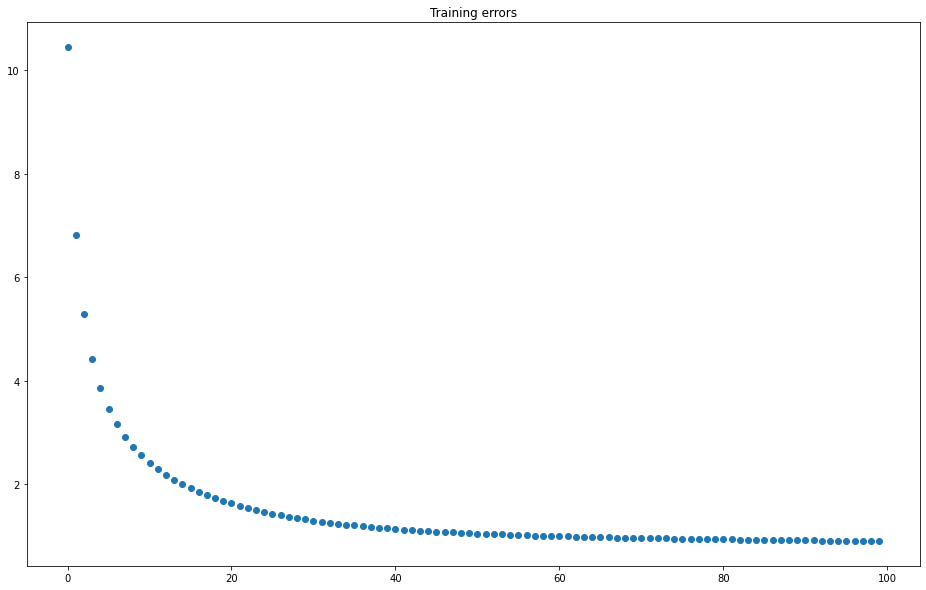

In [94]:
plt.figure(figsize = [16,10])
plt.plot(
    errors_w_constraints,
    'o'
)
plt.title("Training errors")

In [102]:
y_pred_constraint = model.predict()

In [108]:
{
    'max value': y_pred_constraint.max(),
    'min value': y_pred_constraint.min(),
    'average value': y_pred_constraint.mean(),
    'median value': np.median(y_pred_constraint), 
    'quantile 0.05' : np.quantile(y_pred_constraint, 0.05),
    'quantile 0.65': np.quantile(y_pred_constraint, 0.65),
}

{'max value': 5.0,
 'min value': 0.0,
 'average value': 3.948437599644241,
 'median value': 4.039203785466523,
 'quantile 0.05': 2.170864264620219,
 'quantile 0.7': 4.861964334615016}

In [113]:
(y_pred_constraint == 5).sum() / (y_pred.shape[0] * y_pred.shape[1])

0.3321650142177197

In [129]:
model.Theta.tofile(
    "data/collaborative-filtering/model/Theta_w_constraints.csv",
    sep= ','    
)

model.X.tofile(
    "data/collaborative-filtering/model/X_w_constraints.csv",
    sep= ','    
)

Text(0.5, 6.79999999999999, 'prediction')

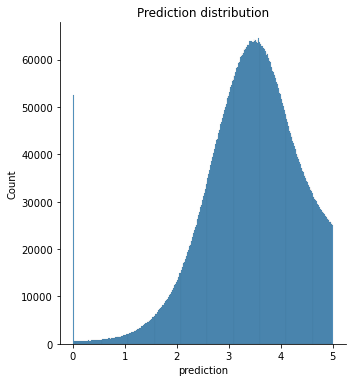

In [115]:

sns.displot(y_pred[y_pred < 5])
plt.title("Prediction distribution")
plt.xlabel("prediction")

In [119]:
np.sign(Theta[:, 1])

array([ 1.,  1., -1.,  1.,  1.])

### Regularization 
From now, we have trained models using $l_2$ regularization. 

Now we will try a $l_1$ regularization model:

$$
    J(\Theta, X) = \sum (y - \theta ^{(i)T}  x^{(j)}) ^2 + \lambda (|| \theta^{(i)} ||+ || x^{(j)} || )
$$

In [123]:
l1_model = SGDOptimizer(
    regularization = 'l1'
)

In [124]:
l1_model.fit(y_train)

599854it [00:08, 66735.90it/s]


train epoch 0;  9.533317457505191


599854it [00:08, 67403.71it/s]


train epoch 1;  5.874849033371517


599854it [00:09, 62606.41it/s]


train epoch 2;  4.478215181958497


599854it [00:09, 60549.48it/s]


train epoch 3;  3.6796523222770485


599854it [00:09, 61318.64it/s]


train epoch 4;  3.1467054424778684


599854it [00:09, 60929.34it/s]


train epoch 5;  2.763121564155401


599854it [00:09, 61573.54it/s]


train epoch 6;  2.4744724072837556


599854it [00:09, 60041.71it/s]


train epoch 7;  2.2500872334802393


599854it [00:09, 60993.82it/s]


train epoch 8;  2.071350591429898


599854it [00:09, 61361.93it/s]


train epoch 9;  1.9263250957190445


599854it [00:09, 61501.33it/s]


train epoch 10;  1.8068393318515525


599854it [00:09, 61001.31it/s]


train epoch 11;  1.707164619809803


599854it [00:09, 61467.71it/s]


train epoch 12;  1.6231367518988737


599854it [00:09, 61367.61it/s]


train epoch 13;  1.5515532977328792


599854it [00:09, 61554.57it/s]


train epoch 14;  1.4900610010669935


599854it [00:09, 60120.43it/s]


train epoch 15;  1.4367438144816347


599854it [00:09, 60049.88it/s]


train epoch 16;  1.3901438461689164


599854it [00:09, 61430.88it/s]


train epoch 17;  1.3490635013394132


599854it [00:09, 61425.60it/s]


train epoch 18;  1.3125546743387975


599854it [00:09, 61285.89it/s]


train epoch 19;  1.2798692477133877


599854it [00:09, 61330.40it/s]


train epoch 20;  1.2504053235162118


599854it [00:09, 60888.71it/s]


train epoch 21;  1.2236549697775756


599854it [00:09, 60855.06it/s]


train epoch 22;  1.1992351914918835


599854it [00:09, 61279.96it/s]


train epoch 23;  1.1768068381517747


599854it [00:09, 61245.40it/s]


train epoch 24;  1.1561058253309573


599854it [00:09, 60790.08it/s]


train epoch 25;  1.1369054917957944


599854it [00:09, 60746.81it/s]


train epoch 26;  1.119019245047085


599854it [00:09, 61384.65it/s]


train epoch 27;  1.1022966856838943


599854it [00:09, 61330.34it/s]


train epoch 28;  1.086597860272565


599854it [00:10, 58695.17it/s]


train epoch 29;  1.071813294717894


599854it [00:09, 61086.86it/s]


train epoch 30;  1.0578427263155215


599854it [00:10, 58836.30it/s]


train epoch 31;  1.0446043267412457


599854it [00:09, 60720.23it/s]


train epoch 32;  1.0320349836187293


599854it [00:09, 61232.98it/s]


train epoch 33;  1.02006342065323


599854it [00:09, 61191.45it/s]


train epoch 34;  1.0086551669006205


599854it [00:09, 60743.24it/s]


train epoch 35;  0.9977662147169276


599854it [00:09, 60198.89it/s]


train epoch 36;  0.9873357709720466


599854it [00:10, 56382.04it/s]


train epoch 37;  0.9773472939096679


599854it [00:10, 58474.26it/s]


train epoch 38;  0.9677620679339466


599854it [00:09, 61133.86it/s]


train epoch 39;  0.9585513309806662


599854it [00:09, 60869.07it/s]


train epoch 40;  0.9497031517421772


599854it [00:09, 60138.52it/s]


train epoch 41;  0.9411925003531286


599854it [00:09, 61527.48it/s]


train epoch 42;  0.9329939093042278


599854it [00:09, 61976.38it/s]


train epoch 43;  0.9250998586126189


599854it [00:11, 52441.62it/s]


train epoch 44;  0.9174901181964902


599854it [00:10, 55695.84it/s]


train epoch 45;  0.9101426652019421


599854it [00:10, 57999.59it/s]


train epoch 46;  0.9030574957087615


599854it [00:10, 57049.38it/s]


train epoch 47;  0.8962187923310041


599854it [00:10, 58982.06it/s]


train epoch 48;  0.8896151523315281


599854it [00:10, 56874.12it/s]


train epoch 49;  0.883233315672308


599854it [00:11, 52308.55it/s]


train epoch 50;  0.8770635022229155


599854it [00:15, 38764.25it/s]


train epoch 51;  0.8710990072422095


599854it [00:14, 42327.64it/s]


train epoch 52;  0.86531991322683


599854it [00:11, 53163.56it/s]


train epoch 53;  0.8596966066427617


599854it [00:10, 56207.34it/s]


train epoch 54;  0.8542544210794663


599854it [00:10, 57725.45it/s]


train epoch 55;  0.8489831254886182


599854it [00:10, 58754.58it/s]


train epoch 56;  0.8438656809064773


599854it [00:11, 52456.58it/s]


train epoch 57;  0.8388333913092588


599854it [00:10, 57025.86it/s]


train epoch 58;  0.8339394453383733


599854it [00:10, 59454.56it/s]


train epoch 59;  0.829173092814712


599854it [00:10, 59857.31it/s]


train epoch 60;  0.82456003246263


599854it [00:10, 58972.51it/s]


train epoch 61;  0.8201153260699209


599854it [00:10, 59865.48it/s]


train epoch 62;  0.8158405952228613


599854it [00:10, 59698.97it/s]


train epoch 63;  0.8117343390450499


599854it [00:10, 58973.93it/s]


train epoch 64;  0.8077909828026933


599854it [00:10, 59287.37it/s]


train epoch 65;  0.8039960278716752


599854it [00:10, 59533.78it/s]


train epoch 66;  0.800339831249134


599854it [00:10, 59018.95it/s]


train epoch 67;  0.796823088711628


599854it [00:10, 59683.21it/s]


train epoch 68;  0.7934271260073535


599854it [00:10, 59803.43it/s]


train epoch 69;  0.7901565594599361


599854it [00:10, 59528.32it/s]


train epoch 70;  0.786989786200213


599854it [00:10, 59194.92it/s]


train epoch 71;  0.7839323756467679


599854it [00:10, 59846.23it/s]


train epoch 72;  0.7809765681558917


599854it [00:10, 59867.94it/s]


train epoch 73;  0.778111141830387


599854it [00:10, 59624.68it/s]


train epoch 74;  0.7753410356178304


599854it [00:10, 58988.69it/s]


train epoch 75;  0.772648544054464


599854it [00:10, 59108.87it/s]


train epoch 76;  0.7700408520131489


599854it [00:10, 58504.07it/s]


train epoch 77;  0.7675073213990223


599854it [00:11, 50873.65it/s]


train epoch 78;  0.7650546233817653


599854it [00:15, 39518.08it/s]


train epoch 79;  0.7626704269005415


599854it [00:14, 40201.76it/s]


train epoch 80;  0.760357992160642


599854it [00:14, 40216.97it/s]


train epoch 81;  0.7581081668259337


599854it [00:14, 40232.07it/s]


train epoch 82;  0.7559060439063585


599854it [00:10, 59039.88it/s]


train epoch 83;  0.7537419675018922


599854it [00:10, 59429.01it/s]


train epoch 84;  0.7516256446659202


599854it [00:10, 58834.73it/s]


train epoch 85;  0.7495657203423871


599854it [00:10, 59264.96it/s]


train epoch 86;  0.7475308257539082


599854it [00:10, 59121.00it/s]


train epoch 87;  0.7455455346241893


599854it [00:10, 58569.49it/s]


train epoch 88;  0.7435929679506714


599854it [00:10, 59404.24it/s]


train epoch 89;  0.7416622425893057


599854it [00:10, 59597.91it/s]


train epoch 90;  0.7397611931714351


599854it [00:10, 57662.64it/s]


train epoch 91;  0.7378852866404383


599854it [00:10, 59537.94it/s]


train epoch 92;  0.7360405970208528


599854it [00:10, 58748.02it/s]


train epoch 93;  0.7342254440828843


599854it [00:10, 58649.32it/s]


train epoch 94;  0.7324422292402882


599854it [00:10, 59598.97it/s]


train epoch 95;  0.7306809141351593


599854it [00:10, 59557.58it/s]


train epoch 96;  0.7289456203843501


599854it [00:10, 58606.00it/s]


train epoch 97;  0.7272246733227063


599854it [00:10, 57368.77it/s]


train epoch 98;  0.725537410161103


599854it [00:10, 56500.60it/s]


train epoch 99;  0.7238939406241692


In [125]:
l1_model_err = model.get_evaluation_errors()

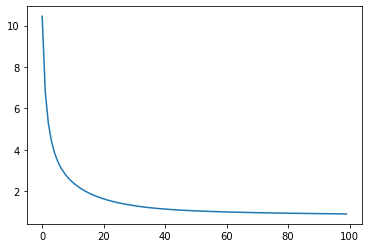

In [126]:
plt.plot(l1_model_err)

In [128]:
l1_model.Theta.tofile(
    "data/collaborative-filtering/model/Theta_l1.csv",
    sep= ','    
)

l1_model.X.tofile(
    "data/collaborative-filtering/model/X_l1.csv",
    sep= ','    
)